In preparing this tutorial, I came to the conclusion that ANOVA in Python is a lot more difficult than it needs to be! So little consistency in syntax and output! Just as I was about to give up hope, I discovered the `pingouin` package, which I think does a pretty good job of simplifying things. What it does under the hood is to take a bunch of the already-existing, but diverse and inconsistent packages, and puts a nicer, simpler wrapper on top of them. So, before we get started, we will need to install `pingouin`:

In [ ]:
pip install pingouin

## One-way ANOVA

We use one-way ANOVA when we have multiple groups that we are comparing on a single measure. As an example, we can use the clinical trial data from the Learning Statistics with Python book. As always, we can start by importing the packages we need, and then loading and inspecting the data:

In [5]:
import pandas as pd
import seaborn as sns
import pingouin as pg

df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/datasets/clintrial_1predictor.csv")

In [12]:
df.head()

,drug,mood_gain
0,placebo,0.5
1,placebo,0.3
2,placebo,0.1
3,anxifree,0.6
4,anxifree,0.4


In these fictious data, we have three groups of participants in a clinical trial: one group received one drug, anxifree, another group received another drug, joyzepam, and the third group received a placebo treatment. So, we have one predictor variable, `drug`, and one outcome variable, `mood_gain`. If we plot the data, it looks like joyzepam gives the best result, but is the difference statistically significant?

<AxesSubplot:xlabel='drug', ylabel='mood_gain'>

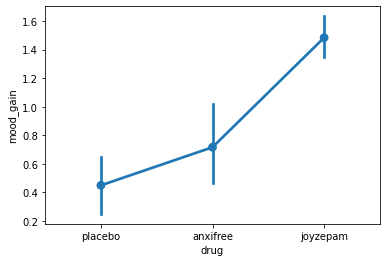

In [3]:
sns.pointplot(data = df, x = 'drug', y = 'mood_gain')

This data calls for a one-way ANOVA, and `pingouin` makes it quite easy. In fact, `pingouin` adds extra superpowers to our `pandas` dataframe, so that it can now compute ANOVA's for us:

In [9]:
# our outcome measure, or "dependent variable" (dv) is mood_gain
# our between-subjects predictor variable is "drug"

df.anova(dv = 'mood_gain', between = 'drug', detailed=True)


,Source,SS,DF,MS,F,p-unc,np2
0,drug,3.453333,2,1.726667,18.610778,0.000086,0.712762
1,Within,1.391667,15,0.092778,NaN,NaN,NaN


To report an ANOVA, we need to report the F-value, the p-value, and two different degrees of freedom: one for predictor variable, and one for the participants. `pingouin` provides these for us, so all we need to do is find them in the ANOVA table (above). To report our results, we can write: "A one-way analysis of variance showed a significant effect of drug (F(2,15) = 18.61, p = 0.000086)."

The "p-unc" in the table is our p-value. The "unc" means uncorrected for multiple comparisons, which is fine, because we haven't done any multiple comparisons yet. If we do want to do some post-hoc t-tests, we use the `pairwise_ttests` functionality which `pingouin` has added to our dataframe. To specify what kind of correction for multiple comparisons we want to use, we use the `padjust` argument. Here we are doing a Bonferroni correction:

In [18]:
df.pairwise_ttests(dv = 'mood_gain', between = 'drug', padjust = 'bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,drug,anxifree,joyzepam,False,True,-4.206222,10.0,two-sided,0.001811,0.005432,bonf,17.947,-2.241659
1,drug,anxifree,placebo,False,True,1.354183,10.0,two-sided,0.205486,0.616459,bonf,0.814,0.721696
2,drug,joyzepam,placebo,False,True,7.168708,10.0,two-sided,0.000030,0.000091,bonf,475.231,3.820482


## Two-way ANOVA

In [ ]:
df.head()

In [ ]:
sns.pointplot(data = df, x = 'drug', y = 'mood_gain', hue = 'therapy')

In [ ]:
df.anova(dv="mood_gain", between=["drug", "therapy"]).round(3)


## One-way Repeated Measures ANOVA

In [ ]:
#df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/datasets/stroop_2021_long.csv")
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/plants_leaves.csv")
df.head()

In [ ]:
sns.pointplot(data = df)

In [ ]:
pg.rm_anova(df)

# for long format data, see: https://pingouin-stats.org/generated/pingouin.rm_anova.html#pingouin.rm_anova

## Two-way Repeated Measures ANOVA

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/datasets/stroop_2021_long.csv")
#df = pd.read_csv("https://raw.githubusercontent.com/marsja/jupyter/master/Python_ANOVA/rmAOV1way.csv")
df.head()

In [ ]:
pg.rm_anova(df)

In [ ]:
aov = pg.rm_anova(dv='DesireToKill',
...                   within=['Disgustingness', 'Frighteningness'],
...                   subject='Subject', data=df)